In [1]:
!pip install transformers
!pip install datasets
!pip install soundfile # This module can read and write sound files
!pip install librosa # offers various functions for music and audio analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00


In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [3]:
from datasets import load_dataset, load_from_disk

# A collection of different sounds of 5 seconds

dataset = load_dataset("ashraq/esc50", split="train[0:10]") # first 10 exapmles



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [4]:
sample = dataset[0]
print(sample)

{'filename': '1-100032-A-0.wav', 'fold': 1, 'target': 0, 'category': 'dog', 'esc10': True, 'src_file': 100032, 'take': 'A', 'audio': {'path': None, 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 44100}}


Sampling Rate for Transformer Models -->> Sampling = measuring the value of a continuous signal at fixed time steps.
Sampling rate(Hz) = number of samples taken in one second.
For a transformer trained on 16 kHz audio, an array of 960,000 values will look like a 60-second reducing at 16 kHz (60*16000=960000)
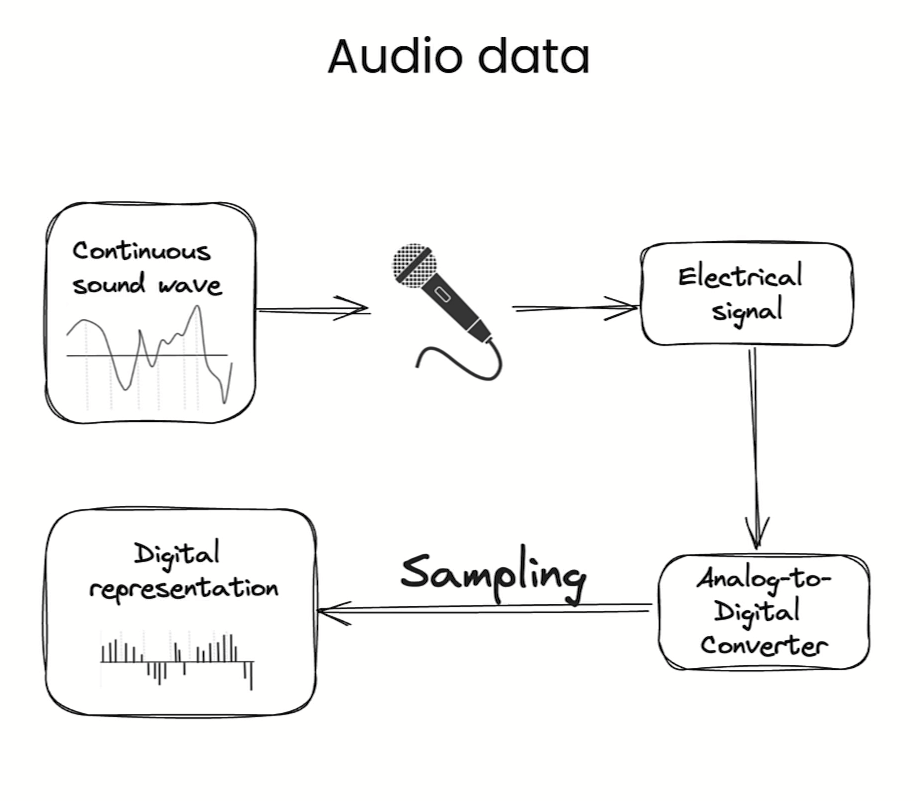

In [6]:
from IPython.display import Audio as IPythonAudio
# the sample audio
IPythonAudio(sample["audio"]["array"], rate=sample["audio"]["sampling_rate"])

In [7]:
from transformers import pipeline

In [8]:
zero_shot_classifier = pipeline(
task="zero-shot-audio-classification",
model="laion/clap-htsat-unfused")

config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

sampling rate used by the feature extractor in zero-shot classifier

In [9]:
zero_shot_classifier.feature_extractor.sampling_rate

48000

sampling rate  of audio sample in dataset

In [11]:
sample["audio"]["sampling_rate"]

44100

In [12]:
from datasets import Audio

In [13]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=48_000))

In [14]:
s = dataset[0]

In [15]:
print(s)

{'filename': '1-100032-A-0.wav', 'fold': 1, 'target': 0, 'category': 'dog', 'esc10': True, 'src_file': 100032, 'take': 'A', 'audio': {'path': None, 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 48000}}


In [34]:
candidate_labels = ["Sound of a dog", "Sound of a bird"]

In [35]:
zero_shot_classifier(s["audio"]["array"], candidate_labels=candidate_labels)

[{'score': 0.9399152994155884, 'label': 'Sound of a dog'},
 {'score': 0.06008468568325043, 'label': 'Sound of a bird'}]

In [36]:
from IPython.display import Audio as IPythonAudio
IPythonAudio(s["audio"]["array"], rate=s["audio"]["sampling_rate"])

In [37]:
candidate_labels = ["Sound of a cricket bat",
                    "Sound of someone screaming",
                    "Sound of a bird chirping",
                    "Sound of a child crying"]

In [38]:
zero_shot_classifier(s["audio"]["array"], candidate_labels=candidate_labels)

[{'score': 0.8843290209770203, 'label': 'Sound of a cricket bat'},
 {'score': 0.06649653613567352, 'label': 'Sound of someone screaming'},
 {'score': 0.04848979413509369, 'label': 'Sound of a bird chirping'},
 {'score': 0.0006846290780231357, 'label': 'Sound of a child crying'}]